# Modelowanie Pandemii SARS COV-19

---

# 1.Historia

---

# 2.Podstawy teoretyczne

## 2.1Łańcuch markowa

## 2.2Wprowadzenie do modelu SI:

Model SI (Susceptible-Infected) jest podstawowym modelem epidemiologicznym wykorzystywanym do opisu rozprzestrzeniania się chorób zakaźnych w populacji. Zakłada on dwie podstawowe grupy: osoby podatne na zakażenie (S) oraz osoby zakażone (I). Razem tworzą one populację (N). 
$${N} = {S} + {I}$$
Osoby zakażone mogą przekazywać chorobę osobom podatnym, co prowadzi do wzrostu liczby zakażonych, podczas gdy liczba osób podatnych maleje. Kluczowym parametrem w modelu jest szybkość zarażania $\beta$, który opisuje tempo, z jakim choroba jest przekazywana. Współczynnik ten zależy od liczby kontaktów między osobami zakażonymi a osobami podatnymi na zakażenie. Możemy wyróżnić:
$$
\beta \cdot I - \text{Liczba kontaktów ogólna} \\
\beta \cdot I \cdot \frac{S}{N} - \text{Liczba kontaktów z podatnymi}
$$

In [74]:
from IPython.display import Image

Image(url="model_si_obrazek.png")

Schemat modelu SI. Rysunek jest z artykulu [numer artykulu]. Małe s na obrazku reprezentuje $S/N$

Przyrost nowych zakażeń($I_{new}$) można zapisać wzorem:
$$ {I_{new}} = \delta \cdot \beta \cdot I \cdot \frac{S}{N}$$
Dodatkowo zmianę liczby zakażeń w czasie można zapisać jako:
$$I( t + \delta ) = I(t) + I_{new} $$
Dzieki temu otrzymamy:
$$I( t + \delta ) = I(t) + \delta \cdot \beta \cdot I \cdot \frac{S}{N}$$
Po odpowiednich przekształceniach[numer artykulu] dostaniemy 
$$\frac{dI}{dt} = \beta \cdot I(t) \cdot \frac{S(t)}{N}$$

Model ten jest stosunkowo prosty i skuteczny w analizie wczesnych etapów epidemii, gdy nie uwzględniamy jeszcze osób wyleczonych, zmarłych, ani innych czynników, które mogą wpływać na dynamikę choroby. Model SI jest szczególnie użyteczny do prognozowania, jak szybko będzie rosła liczba zakażonych w populacji, szczególnie w fazie wzrostu epidemii.

wykres modelu SI

## 2.3Wprowdzenie do modelu SIR

Model SIR (Susceptible-Infected-Recovered) wprowadza do wcześniej poznanych kategorii S (osoby podatne na zakażenie) oraz I (osoby zakażone) nową kategorię: 𝑅 (osoby wyzdrowiałe lub zmarłe). Do kategorii zaliczają się osoby, które nie są już dłużej zakażone. Obejmuje to zarówno osoby, które zmarły w wyniku choroby, jak i te, które wyzdrowiały, nabywając odporność (nie mogą zachorować ponownie).
W przeciwieństwie do modelu SI, w modelu SIR liczba zakażonych osiąga szczyt, a następnie maleje, ponieważ coraz więcej osób przechodzi do kategorii 
R. Jest to jeden z podstawowych modeli epidemiologicznych, szeroko stosowany do opisu przebiegu epidemii.
Dodatkowo w modelu pojawia się nowy parametr: szybkość zdrowienia $\gamma$, który określa tempo przechodzenia osób zakażonych do kategorii R. Liczbę ozdrowień w czasie możemy wyrazić wzorem:
$$\gamma \cdot {I} - \text{Liczba ozdrowień w czasie}$$

In [75]:
from IPython.display import Image

Image(url="model_sir_obrazek.png")

Schemat modelu SIR. Rysunek jest z artykulu [numer artykulu]. Małe s na obrazku reprezentuje $S/N$, a ${v}$ gammę.

Możemy zapisać równanie:
$$ S(t + \delta) = S(t) - I_{new}$$
Dzięki czemu dla liczby osobników podatnych otrzymamy
$$\frac{dS}{dt} = - \beta \cdot {I(t)} \cdot \frac{S(t)}{N}$$
Po odpowiednich przekształceniach dostaniemy:
$$
\frac{dI}{dt} = \beta \cdot I(t) \cdot \frac{S(t)}{N} - \gamma \cdot {I} \\
\frac{dR}{dt} = \gamma \cdot {I}
$$
Te trzy równania stanowią ostateczną postać modelu SIR, opisującą dynamikę zmian w liczebności poszczególnych grup.
Model SIR można rozszerzyć, wprowadzając różne relacje pomiędzy grupami, np. uwzględniając sytuację, w której osobnik nie nabywa odporności i może ponownie zachorować. Jednak w naszym projekcie skupimy się na jego klasycznej formie. Model ten, mimo swojej prostoty, jest kluczowym narzędziem do analizy rozprzestrzeniania się chorób i stanowi fundament bardziej zaawansowanych modeli epidemiologicznych.

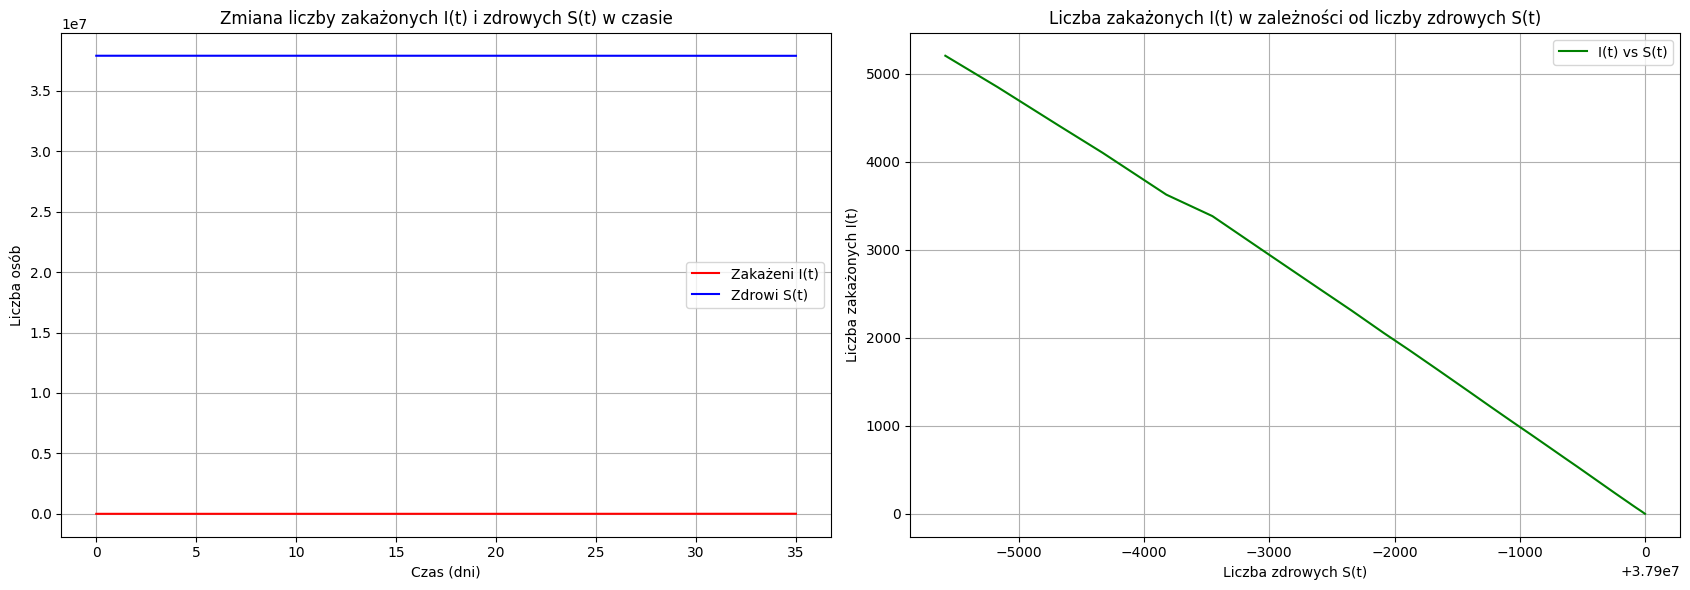

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry
N = 37_900_000  # Całkowita liczba osób w populacji
gamma = 0.1  # Współczynnik wyzdrowienia

# Dane: zakażeni i wyzdrowiali
infected_data = [1, 1, 3, 6, 11, 17, 22, 31, 51, 68, 104, 125, 177, 238, 287, 355, 425, 536, 
                 634, 749, 901, 1051, 1221, 1389, 1638, 1862, 2055, 2311, 2554, 2946, 3383, 
                 3627, 4102, 4413, 4848, 5205]
recovery_data = [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3, 4, 5, 5, 5, 5, 5, 7, 8,
                 10, 14, 16, 16, 18, 22, 31, 33, 43, 57, 71, 195, 228, 269, 320, 381]

# Liczba zdrowych osób w danym dniu
susceptible_data = [N - infected_data[i] - recovery_data[i] for i in range(len(infected_data))]

# Tworzenie wykresów obok siebie
fig, ax = plt.subplots(1, 2, figsize=(17, 6))

# 1. Wykres I(t) i S(t) na jednym wykresie
ax[0].plot(infected_data, label="Zakażeni I(t)", color='red')
ax[0].plot(susceptible_data, label="Zdrowi S(t)", color='blue')
ax[0].set_title("Zmiana liczby zakażonych I(t) i zdrowych S(t) w czasie")
ax[0].set_xlabel("Czas (dni)")
ax[0].set_ylabel("Liczba osób")
ax[0].legend()
ax[0].grid(True)

# 2. Wykres I(t) w zależności od S(t)
ax[1].plot(susceptible_data, infected_data, label="I(t) vs S(t)", color='green')
ax[1].set_title("Liczba zakażonych I(t) w zależności od liczby zdrowych S(t)")
ax[1].set_xlabel("Liczba zdrowych S(t)")
ax[1].set_ylabel("Liczba zakażonych I(t)")
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Parametry początkowe
n = 37_900_000  
dates = ['04.03.2020', '05.03.2020', '06.03.2020', '07.03.2020', '08.03.2020', '09.03.2020',
         '10.03.2020', '11.03.2020', '12.03.2020', '13.03.2020', '14.03.2020', '15.03.2020',
         '16.03.2020', '17.03.2020', '18.03.2020', '19.03.2020', '20.03.2020', '21.03.2020', 
         '22.03.2020', '23.03.2020', '24.03.2020', '25.03.2020', '26.03.2020', '27.03.2020', 
         '28.03.2020', '29.03.2020', '30.03.2020', '31.03.2020', '01.04.2020', '02.04.2020', 
         '03.04.2020', '04.04.2020', '05.04.2020', '06.04.2020', '07.04.2020', '08.04.2020']
infected_data = [1, 1, 3, 6, 11, 17, 22, 31, 51, 68, 104, 125, 177, 238, 287, 355, 425, 536, 
                 634, 749, 901, 1051, 1221, 1389, 1638, 1862, 2055, 2311, 2554, 2946, 3383, 
                 3627, 4102, 4413, 4848, 5205]
recovery_data = [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3, 4, 5, 5, 5, 5, 5, 7, 8,
                 10, 14, 16, 16, 18, 22, 31, 33, 43, 57, 71, 195, 228, 269, 320, 381]

S0 = n - 1  # Liczba osób podatnych (cała populacja z wyjątkiem jednej osoby zakażonej)
I0 = 1  # Liczba początkowych zakażonych
R0 = 0  # Liczba początkowych wyleczonych

# Funkcja do aktualizacji wykresu
def update(beta, gamma):
    # Symulacja numeryczna metodą Eulera
    t_max = len(dates)
    S = np.zeros(t_max)
    I = np.zeros(t_max)
    R = np.zeros(t_max)
    S[0] = S0
    I[0] = I0
    R[0] = R0

    dt = 1  # Krok czasowy
    for t in range(1, t_max):
        dS = -beta * S[t-1] * I[t-1] * dt / n
        dI = beta * S[t-1] * I[t-1] * dt / n - gamma * I[t-1] * dt
        dR = gamma * I[t-1] * dt
        S[t] = S[t-1] + dS
        I[t] = I[t-1] + dI
        R[t] = R[t-1] + dR

    # Rysowanie wykresu
    plt.figure(figsize=(10, 6))
    plt.plot(range(t_max), infected_data, 's', label='Dane rzeczywiste (Zakażeni)', color='red')
    plt.plot(range(t_max), recovery_data, 's', label='Dane rzeczywiste (Wyzdrowiali)', color='green')
    plt.plot(range(t_max), I, label=f'Symulacja (Zakażeni) - beta = {beta:.2f}, gamma = {gamma:.2f}', linestyle='--', color='blue')
    plt.plot(range(t_max), R, label=f'Symulacja (Wyzdrowiali) - beta = {beta:.2f}, gamma = {gamma:.2f}', linestyle='--', color='orange')

    plt.xticks(range(t_max), dates, rotation=45)
    plt.xlabel('Data')
    plt.ylabel('Liczba osób')
    plt.title('Symulacja rozwoju epidemii - Model SIR')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Odświeżenie wykresu
    plt.show()

# Interaktywne suwaki
interact(update, beta=(0.0, 1.0, 0.01), gamma=(0.0, 1.0, 0.01))

interactive(children=(FloatSlider(value=0.5, description='beta', max=1.0, step=0.01), FloatSlider(value=0.5, d…

<function __main__.update(beta, gamma)>

---

# Obliczanie współczynników $\beta$ i $\gamma$ za pomocą metody brute force (Algorytm siłowy)

### Metoda brute force

Algorytm brute force, czyli "siłowy", polega na przeszukaniu całego dostępnego zakresu możliwych wartości dla współczynników $\beta$ i $\gamma$ oraz znalezieniu takich, które minimalizują błąd dopasowania modelu do danych.

1. **Zakresy dla $\beta$ i $\gamma$**:
   - Zaczynamy od ustalenia zakresu wartości, w którym będziemy szukać optymalnych współczynników. W tym przykładzie $\beta$ jest poszukiwane w przedziale od 0 do 0.5, a $\gamma$ od 0 do 0.3.

2. **Obliczanie błędu dopasowania**:
   - Dla każdej pary wartości $\beta$ i $\gamma$ rozwiązujemy równania modelu SIR, a następnie obliczamy, jak bardzo przewidywane wyniki różnią się od rzeczywistych danych zakażonych (I) i wyzdrowiałych (R). Błąd dopasowania jest mierzony jako średni błąd kwadratowy (Mean Squared Error - MSE).

3. **Przeszukiwanie przestrzeni parametrów**:
   - Algorytm przechodzi przez wszystkie kombinacje $\beta$ i $\gamma$ w zadanym zakresie, obliczając dla każdej kombinacji błąd dopasowania. Na końcu wybieramy parametry, które minimalizują ten błąd.

### Zastosowanie

Metoda brute force jest stosunkowo prosta, ale może być czasochłonna przy dużych zakresach parametrów. Pomimo tego jest bardzo intuicyjna i skuteczna w przypadku małych przestrzeni poszukiwań, jak w tym przykładzie. Po znalezieniu optymalnych współczynników możemy wykorzystać model SIR do prognozowania przyszłego rozwoju epidemii.

In [14]:
import numpy as np
from scipy.integrate import odeint

# Parametry modelu
N = 37_900_000  # Całkowita liczba osób w populacji

# Zakładamy dane obserwacyjne: zakażeni i wyzdrowiali w czasie
infected_data = [1, 1, 3, 6, 11, 17, 22, 31, 51, 68, 104, 125, 177, 238, 287, 355, 425, 536, 
                 634, 749, 901, 1051, 1221, 1389, 1638, 1862, 2055, 2311, 2554, 2946, 3383, 
                 3627, 4102, 4413, 4848, 5205]
recovery_data = [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3, 4, 5, 5, 5, 5, 5, 7, 8,
                 10, 14, 16, 16, 18, 22, 31, 33, 43, 57, 71, 195, 228, 269, 320, 381]

# Liczba zdrowych osób w danym dniu
susceptible_data = [N - infected_data[i] - recovery_data[i] for i in range(len(infected_data))]

# Funkcja opisująca model SIR
def sir_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N  # Zmiana liczby zdrowych osób
    dIdt = beta * S * I / N - gamma * I  # Zmiana liczby zakażonych
    dRdt = gamma * I  # Zmiana liczby wyzdrowiałych
    return [dSdt, dIdt, dRdt]

# Zakresy poszukiwań dla beta i gamma
beta_range = np.linspace(0, 0.5, 50)  # Przedział poszukiwań dla beta
gamma_range = np.linspace(0, 0.3, 50)  # Przedział poszukiwań dla gamma

# Funkcja do obliczenia błędu dopasowania
def calculate_error(beta, gamma):
    # Przyjmujemy początkowe warunki
    S0 = N - infected_data[0] - recovery_data[0]  # Początkowa liczba zdrowych
    I0 = infected_data[0]  # Początkowa liczba zakażonych
    R0 = recovery_data[0]  # Początkowa liczba wyzdrowiałych
    
    # Rozwiązanie równań SIR
    t = np.linspace(0, len(infected_data), len(infected_data))  # Czas (dni)
    solution = odeint(sir_model, [S0, I0, R0], t, args=(beta, gamma))
    
    # Obliczamy błąd dopasowania (średni błąd kwadratowy)
    I_model = solution[:, 1]
    R_model = solution[:, 2]
    
    mse = np.mean((I_model - np.array(infected_data))**2 + (R_model - np.array(recovery_data))**2)
    return mse

# Przeszukujemy przestrzeń parametrów beta i gamma
best_beta = 0
best_gamma = 0
min_error = float('inf')

for beta in beta_range:
    for gamma in gamma_range:
        error = calculate_error(beta, gamma)
        if error < min_error:
            min_error = error
            best_beta = beta
            best_gamma = gamma

# Wyświetlamy najlepsze parametry
print(f"Optymalne beta: {best_beta}")
print(f"Optymalne gamma: {best_gamma}")


Optymalne beta: 0.26530612244897955
Optymalne gamma: 0.01836734693877551


---

# Metoda Eulera

## Wyjaśnienie metody Eulera

Metoda Eulera służy do rozwiązywania równań różniczkowych pierwszego rzędu w postaci [[x]](https://vistula.pk.edu.pl/~sciezor/Kurs_TI_XP/Excel2_lekcja_4.pdf):


\begin{equation}
\frac{dy}{dt} = f(t, y), \quad y(x_0) = y_0
\end{equation}

Zakładamy, że każdy kolejny punkt jest oddalony o krok **h** na osi **OX** oraz o $\Delta$**y** na osi **OY**  

\begin{equation}
x_{n+1} = x_n + h
\end{equation}

Z definicji pochodnej, rozumianej jako tangens kąta nachylenia stycznej w punkcie na wykresie funkcji, wynika, że

\begin{equation}
y' = \frac{\Delta y}{h} = f(x_n, y_n)
\end{equation}

Po przekształceniu:


\begin{equation}
\Delta y = h \cdot f(x_n, y_n)
\end{equation}

Wzór na kolejny $y_{n+1}$ będzie zależał od $y_n$ oraz $\Delta$**y**

\begin{equation}
y_{n+1} = y_n + h \cdot f(x_n, y_n)
\end{equation}

## Numeryczne rozwiązanie metodą Eulera równania SI

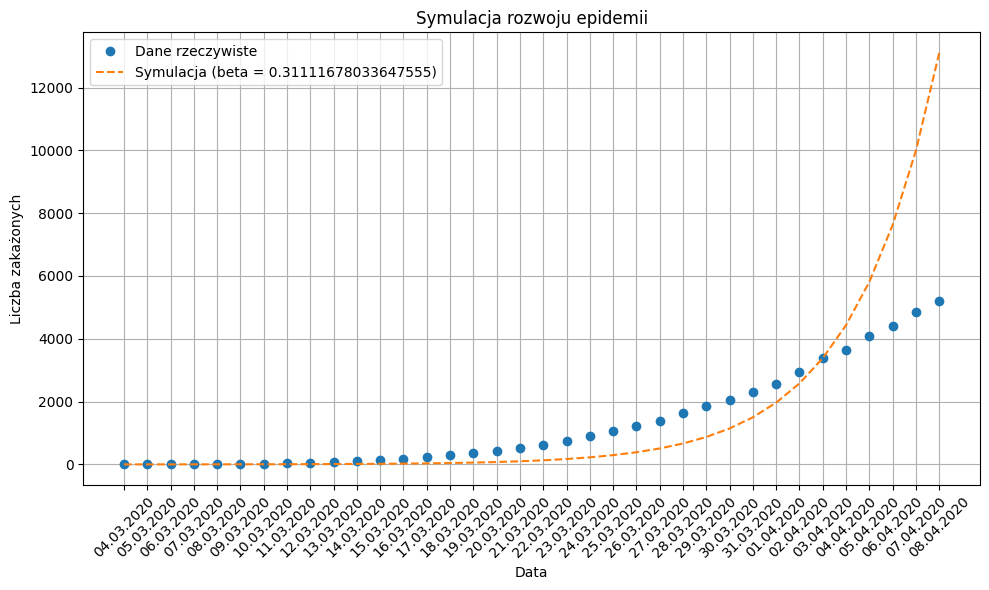

In [78]:

# Parametry początkowe
n = 37_900_000  # Populacja
S0 = n - 1  # Liczba osób podatnych (cała populacja z wyjąciem jednej osoby zakażonej)
I0 = 1  # Liczba początkowych zakażonych

# Dane: dni i liczba zakażonych
dates = ['04.03.2020', '05.03.2020', '06.03.2020', '07.03.2020', '08.03.2020', '09.03.2020',
         '10.03.2020', '11.03.2020', '12.03.2020', '13.03.2020', '14.03.2020', '15.03.2020',
         '16.03.2020', '17.03.2020', '18.03.2020', '19.03.2020', '20.03.2020', '21.03.2020', '22.03.2020', '23.03.2020', '24.03.2020', '25.03.2020', '26.03.2020', 
         '27.03.2020', '28.03.2020', '29.03.2020', '30.03.2020', '31.03.2020', '01.04.2020',
         '02.04.2020', '03.04.2020', '04.04.2020', '05.04.2020', '06.04.2020', '07.04.2020', '08.04.2020']
infected_data = [1, 1, 3, 6, 11, 17, 22, 31, 51, 68, 104, 125, 177, 238, 287, 355, 425, 536, 634, 749, 901, 1051, 1221, 1389, 1638, 1862, 2055, 2311, 2554, 
                 2946, 3383, 3627, 4102, 4413, 4848, 5205]  # Dane o liczbie zakażonych  # Dane zakażonych

# Symulacja numeryczna metodą Eulera
def update(beta):
    t_max = len(dates)  # Ilość dni
    I = np.zeros(t_max)
    S = np.zeros(t_max)
    I[0] = I0
    S[0] = S0
# Krok czasowy
    dt = 1
# Rozwiązanie równania metodą Eulera
    for t in range(1, t_max):
        dI = beta * I[t-1] * S[t-1] * dt / n
        I[t] = I[t-1] + dI
        S[t] = S[t-1] - dI

# Porównanie z danymi
    plt.figure(figsize=(10, 6))
    plt.plot(range(t_max), infected_data, 'o', label='Dane rzeczywiste')
    plt.plot(range(t_max), I, label=f'Symulacja (beta = {beta})', linestyle='--')
    plt.xticks(range(t_max), dates, rotation=45)
    plt.xlabel('Data')
    plt.ylabel('Liczba zakażonych')
    plt.title('Symulacja rozwoju epidemii')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

update(best_beta)



## Numeryczne rozwiązanie metodą Eulera równania SIR

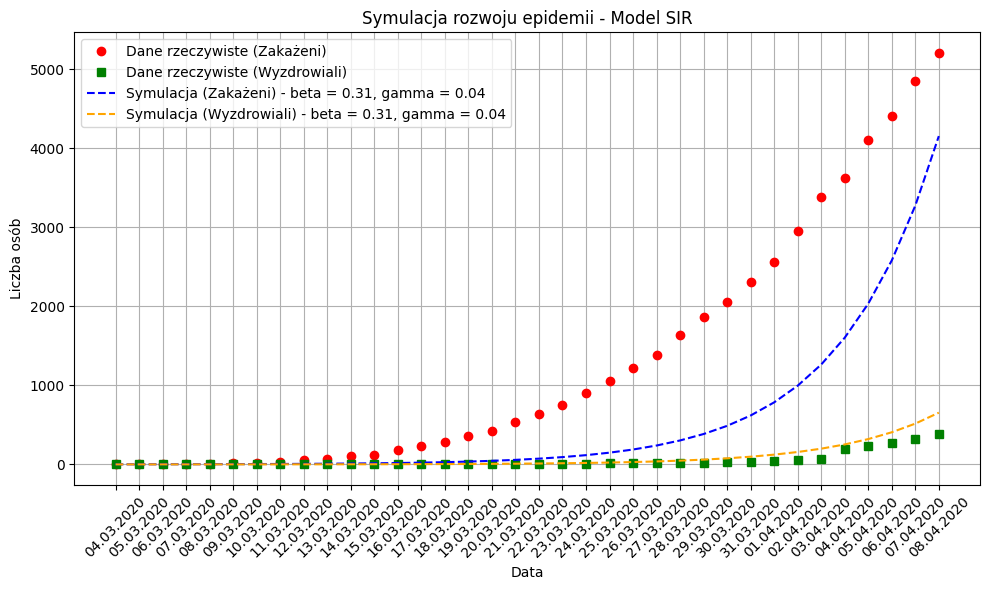

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry początkowe
n = 37_900_000  # Populacja
S0 = n - 1  # Liczba osób podatnych (cała populacja z wyjątkiem jednej osoby zakażonej)
I0 = 1  # Liczba początkowych zakażonych
R0 = 0  # Liczba początkowych wyleczonych

# Dane: dni i liczba zakażonych
dates = ['04.03.2020', '05.03.2020', '06.03.2020', '07.03.2020', '08.03.2020', '09.03.2020',
         '10.03.2020', '11.03.2020', '12.03.2020', '13.03.2020', '14.03.2020', '15.03.2020',
         '16.03.2020', '17.03.2020', '18.03.2020', '19.03.2020', '20.03.2020', '21.03.2020', '22.03.2020', '23.03.2020', '24.03.2020', '25.03.2020', '26.03.2020',
         '27.03.2020', '28.03.2020', '29.03.2020', '30.03.2020', '31.03.2020', '01.04.2020',
         '02.04.2020', '03.04.2020', '04.04.2020', '05.04.2020', '06.04.2020', '07.04.2020', '08.04.2020']

# Dane zakażonych w rzeczywistości (szacowane)
infected_data = [1, 1, 3, 6, 11, 17, 22, 31, 51, 68, 104, 125, 177, 238, 287, 355, 425, 536, 634, 749, 901, 1051, 1221, 1389, 1638, 1862, 2055, 2311, 2554,
                 2946, 3383, 3627, 4102, 4413, 4848, 5205]  # Dane o liczbie zakażonych

# Dane o liczbie wyzdrowiałych
recovery_data = [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3, 4, 5, 5, 5, 5, 5, 7, 8,
                 10, 14, 16, 16, 18, 22, 31, 33, 43, 57, 71, 195, 228, 269, 320, 381]  # Dane o liczbie wyzdrowiałych

# Funkcja do aktualizacji wykresu
def update(beta, gamma):
    # Symulacja numeryczna metodą Eulera
    t_max = len(dates)
    S = np.zeros(t_max)
    I = np.zeros(t_max)
    R = np.zeros(t_max)
    S[0] = S0
    I[0] = I0
    R[0] = R0

    dt = 1  # Krok czasowy
    for t in range(1, t_max):
        dS = -beta * S[t-1] * I[t-1] * dt / n
        dI = beta * S[t-1] * I[t-1] * dt / n - gamma * I[t-1] * dt
        dR = gamma * I[t-1] * dt
        S[t] = S[t-1] + dS
        I[t] = I[t-1] + dI
        R[t] = R[t-1] + dR

    # Rysowanie wykresu
    plt.figure(figsize=(10, 6))
    plt.plot(range(t_max), infected_data, 'o', label='Dane rzeczywiste (Zakażeni)', color='red')
    plt.plot(range(t_max), recovery_data, 's', label='Dane rzeczywiste (Wyzdrowiali)', color='green')
    plt.plot(range(t_max), I, label=f'Symulacja (Zakażeni) - beta = {beta:.2f}, gamma = {gamma:.2f}', linestyle='--', color='blue')
    plt.plot(range(t_max), R, label=f'Symulacja (Wyzdrowiali) - beta = {beta:.2f}, gamma = {gamma:.2f}', linestyle='--', color='orange')

    plt.xticks(range(t_max), dates, rotation=45)
    plt.xlabel('Data')
    plt.ylabel('Liczba osób')
    plt.title('Symulacja rozwoju epidemii - Model SIR')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Odświeżenie wykresu
    plt.show()


# Wywołanie funkcji z określonymi wartościami beta i gamma
update(best_beta, best_gamma)


## Wyniki modelowania metodą Eulera dla SI i SIR


# SI

Na wykresie można zaobserwować powolny wzrost liczby chorych, natomiast zastosowany model SI wykazuje bardzo gwałtowny wzrost. Model SI przewiduje dalszy, bardzo szybki wzrost liczby zakażonych, który nie ma odzwierciedlenia w rzeczywistych danych. Wynika to z tego, że model SI nie uwzględnia wielu czynników zewnętrznych takich jak śmierć osób zakażonych, interwencji społecznych, osób wyleczonych czy też osób narażonych na zakażenie, które wpływają na tempo rozwoju epidemii. Model SI, oparty na stałym współczynniku infekcji, nie uwzględnia dynamicznych zmian w rozwoju epidemii, co może prowadzić do nadmiernego prognozowania osób zarażonych. Współczynnik $\beta$ może być różny w innych etapach epidemii, więc stały parametr nie odzwierciedla realnej sytuacji. 

# SIR

Model SIR pokazuje wolniejszy wzrost zakażonych niż model SI. Można zauważyć, że dodanie współczynnika odpowiadającego za osoby wyleczone zwalnia wzrost zakażeń w symulacji, dzięki czemu bardziej odpowiada danym rzeczywistym. Warto podkreślić, że nie jest to idealny model, ponieważ podobnie jak model SI nie uwzględnia wiele czynników, które wpływają na rozwój epidemii. Model SIR może sprawdzić się w modelowaniu początku epidemii, w kolejnych fazach epidemii problemem mogą okazać się stałe współczynniki $\beta$ oraz $\gamma$.

---

# Runge-Kutta rzędu 4 (RK4)

## Wyjaśnienie metody Runge-Kutta rzędu 4 (RK4)

Metoda RK4 jest jedną z najczęściej używanych metod numerycznych do rozwiązywania równań różniczkowych zwyczajnych. Popularność zawdzięcza swojej wyjątkowej precyzji, będącej efektem wyższego rzędu dokładności w stosunku do prostszych metod, takich jak metoda Eulera.

Metoda Rungego-Kutty rzędu 4 (RK4) opiera się na następujących wzorach:

1. Początkowy warunek:
$$u_0 = \alpha$$

2. Wyznaczanie kolejnych współczynników:
$$k_1 = F(t, y_n)$$
$$k_2 = F\left(t + \frac{h}{2}, y_n + \frac{1}{2}k_1\right)$$
$$k_3 = F\left(t + \frac{h}{2}, y_n + \frac{1}{2}k_2\right)$$
$$k_4 = F\left(t + h, y_n\right)$$

3. Aktualizacja wartości $u_{i+1}$:
$$y_{i+1} = y_i + \frac{h}{6} \left(k_1 + 2k_2 + 2k_3 + k_4\right), \quad \text{dla } n = 0, 1, \ldots$$

Gdzie:
* ${h}$ — krok czasowy,
* ${F(t,y)}$ — funkcja opisująca równanie różniczkowe $\frac{dy}{dt} = F(t, y)$,
* ${t}$ — czas,
* ${y_n}$ — wartość rozwiązania w kroku ${n}$.

## Numeryczne rozwiązanie metodą Runge-Kutta rzędu 4 modelu SI 

Żeby obliczyc model SI numerycznie przyjmiemy zapis gdzie:
$$\frac{dy}{dt} = F(t, y)$$
oraz
$${y}=
\begin{bmatrix}
S\left(t\right) \\
I\left(t\right)
\end{bmatrix},
~~{F(t,y)}=\begin{bmatrix}
f\left(t,S,I\right) \\
g\left(t,S,I\right) 
\end{bmatrix}

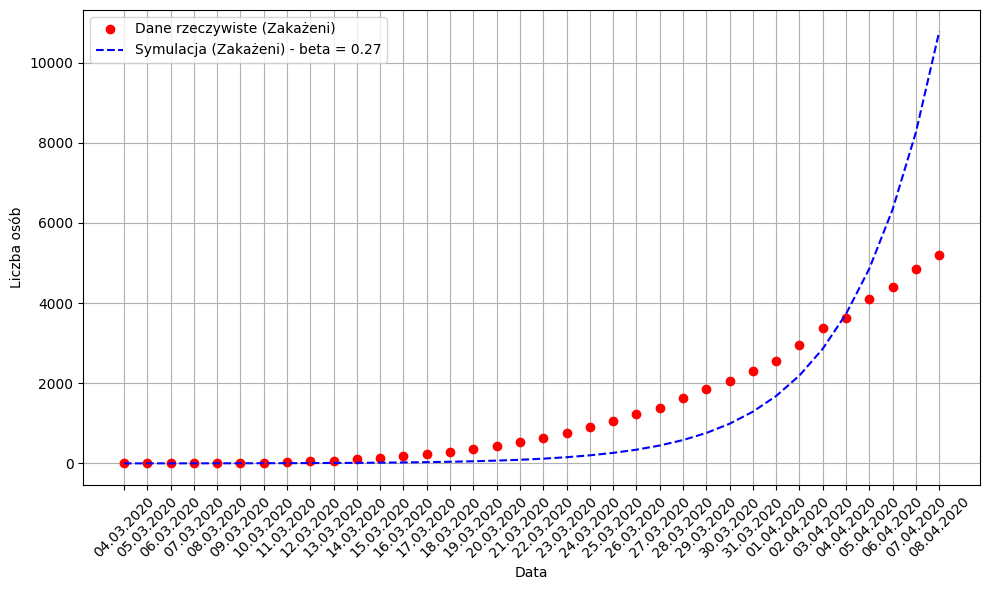

In [39]:
# Funkcja dla modelu SI
def f(S, I, beta, N):
    return -beta * S * I / N

def g(S, I, beta, N):
    return beta * S * I / N

# RK4 dla modelu SI
def rk4_step(S, I, beta, N, h):
    k1_S = f(S, I, beta, N)
    k1_I = g(S, I, beta, N)
    
    k2_S = f(S + h * k1_S / 2, I + h * k1_I / 2, beta, N)
    k2_I = g(S + h * k1_S / 2, I + h * k1_I / 2, beta, N)
    
    k3_S = f(S + h * k2_S / 2, I + h * k2_I / 2, beta, N)
    k3_I = g(S + h * k2_S / 2, I + h * k2_I / 2, beta, N)
    
    k4_S = f(S + h * k3_S, I + h * k3_I, beta, N)
    k4_I = g(S + h * k3_S, I + h * k3_I, beta, N)
    
    # Klasyczna aktualizacja wartości
    S_new = S + h / 6 * (k1_S + 2 * k2_S + 2 * k3_S + k4_S)
    I_new = I + h / 6 * (k1_I + 2 * k2_I + 2 * k3_I + k4_I)
    
    return S_new, I_new

# Warunki początkowe
S, I = n - infected_data[0], infected_data[0]
h = 1  # Krok czasowy (1 dzień)
S_vals, I_vals = [S], [I]

# Symulacja RK4
for t in range(1, len(dates)):
    S, I = rk4_step(S, I, best_beta, n, h)
    S_vals.append(S)
    I_vals.append(I)

# Wykresy
plt.figure(figsize=(10, 6))
plt.plot(dates, infected_data, 'o', label='Dane rzeczywiste (Zakażeni)', color='red')
plt.plot(dates, I_vals, label=f'Symulacja (Zakażeni) - beta = {best_beta:.2f}', linestyle='--', color='blue')
plt.xticks(rotation=45)
plt.xlabel("Data")
plt.ylabel("Liczba osób")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Numeryczne rozwiązanie metodą Runge-Kutta rzędu 4 modelu SI 
Żeby obliczyc model SIR numerycznie przyjmiemy zapis gdzie:
$$\frac{dy}{dt} = F(t, y)$$
oraz
$${y}=
\begin{bmatrix}
S\left(t\right) \\
I\left(t\right) \\
R\left(t\right)
\end{bmatrix},
~~{F(t,y)}=\begin{bmatrix}
f\left(t,S,I,R\right) \\
g\left(t,S,I,R\right) \\
j\left(t,S,I,R\right)
\end{bmatrix}

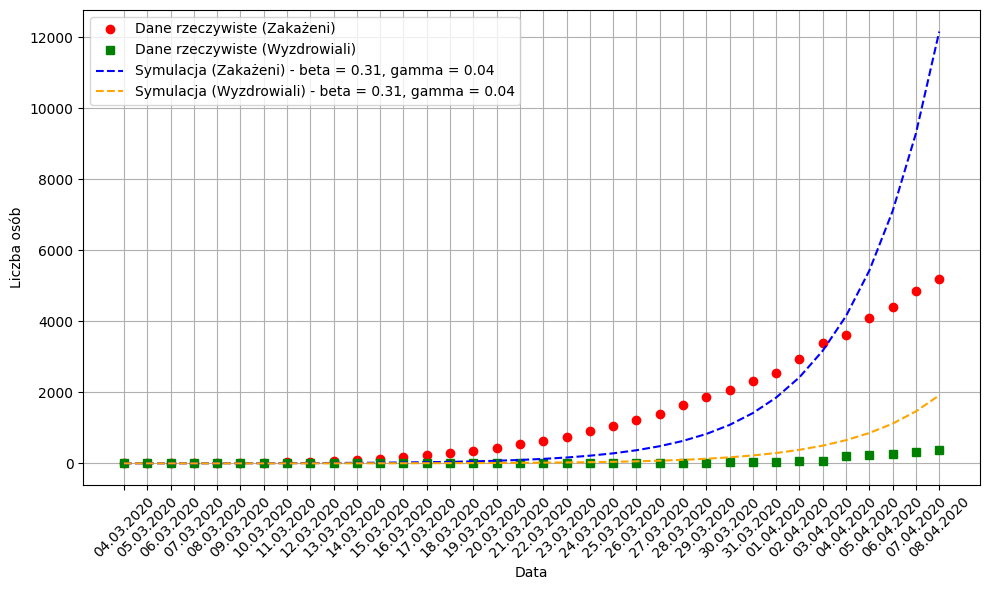

In [81]:
# Funkcje SIR
def f(S, I, R, beta):
    return -beta * S * I / n

def g(S, I, R, beta, gamma):
    return beta * S * I / n - gamma * I

def j(S, I, R, gamma):
    return gamma * I

# RK4 dla modelu SIR
def rk4_step(S, I, R, beta, gamma, h):
    k1_S = f(S, I, R, beta)
    k1_I = g(S, I, R, beta, gamma)
    k1_R = j(S, I, R, gamma)
    
    k2_S = f(S + h * k1_S / 2, I + h * k1_I / 2, R + h * k1_R / 2, beta)
    k2_I = g(S + h * k1_S / 2, I + h * k1_I / 2, R + h * k1_R / 2, beta, gamma)
    k2_R = j(S + h * k1_S / 2, I + h * k1_I / 2, R + h * k1_R / 2, gamma)
    
    k3_S = f(S + h * k2_S / 2, I + h * k2_I / 2, R + h * k2_R / 2, beta)
    k3_I = g(S + h * k2_S / 2, I + h * k2_I / 2, R + h * k2_R / 2, beta, gamma)
    k3_R = j(S + h * k2_S / 2, I + h * k2_I / 2, R + h * k2_R / 2, gamma)
    
    k4_S = f(S + h * k3_S, I + h * k3_I, R + h * k3_R, beta)
    k4_I = g(S + h * k3_S, I + h * k3_I, R + h * k3_R, beta, gamma)
    k4_R = j(S + h * k3_S, I + h * k3_I, R + h * k3_R, gamma)
    
    S_new = S + h / 6 * (k1_S + 2 * k2_S + 2 * k3_S + k4_S)
    I_new = I + h / 6 * (k1_I + 2 * k2_I + 2 * k3_I + k4_I)
    R_new = R + h / 6 * (k1_R + 2 * k2_R + 2 * k3_R + k4_R)
    
    return S_new, I_new, R_new

# Warunki początkowe
S, I, R = n - infected_data[0], infected_data[0], recovery_data[0]
h = 1  # Krok czasowy (1 dzień)
S_vals, I_vals, R_vals = [S], [I], [R]

# Symulacja RK4
for t in range(1, len(dates)):
    S, I, R = rk4_step(S, I, R, best_beta, best_gamma, h)
    S_vals.append(S)
    I_vals.append(I)
    R_vals.append(R)

# Wykresy
plt.figure(figsize=(10, 6))
plt.plot(dates, infected_data, 'o', label='Dane rzeczywiste (Zakażeni)', color='red')
plt.plot(dates, recovery_data, 's', label='Dane rzeczywiste (Wyzdrowiali)', color='green')
plt.plot(dates, I_vals, label=f'Symulacja (Zakażeni) - beta = {best_beta:.2f}, gamma = {best_gamma:.2f}', linestyle='--', color='blue')
plt.plot(dates, R_vals, label=f'Symulacja (Wyzdrowiali) - beta = {best_beta:.2f}, gamma = {best_gamma:.2f}', linestyle='--', color='orange')
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel("Data")
plt.ylabel("Liczba osób")
plt.legend()
plt.tight_layout()
plt.show()

## Wyniki modelowania przy użyciu metody Runge-Kutta


### SI

### SIR

---

# Porównanie błędów numerycznych

# Obliczanie błędu dla metod Eulera i Rungego-Kutty

### Wzór na błąd:

$\epsilon(\Delta t) = \sup_{t \in [0,T]} |S(t) - Se(t)|$

gdzie:
- $S(t)$ to wartości obliczone metodą Eulera,
- $Se(t)$ to wartości obliczone metodą Eulera przy danym kroku czasowym \(\Delta t\),
- $Srk(t)$ to wartości obliczone metodą Rungego-Kutty,
- $Irk(t)$ to rzeczywiste rozwiązanie.

### Kroki obliczeniowe:

1. **Oblicz błąd metody Eulera**:
    
    $\epsilon_E(\Delta t) = \sup_{t \in [0,T]} |S(t) - Se(t)|$
    
2. **Oblicz błąd metody Rungego-Kutty**:
    
    $\epsilon_{RK}(\Delta t) = \sup_{t \in [0,T]} |Srk(t) - Irk(t)|$

3. **Przygotowanie wykresu**:
    - Na osi X: $1/\Delta t$
    - Na osi Y: $\epsilon(\Delta t)$

## Implementacja w pythonie

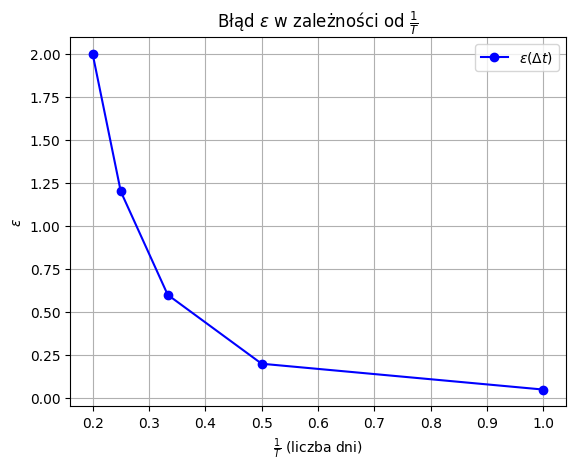

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Funkcja obliczająca błąd epsilon
def epsilon(S, Se):
    """
    Oblicza błąd epsilon: epsilon = sup |S(t) - Se(t)|
    
    S - wyniki metody numerycznej
    Se - wyniki z referencyjnej metody
    """
    return np.max(np.abs(S - Se))

# Przykładowe dane z wyraźnym rosnącym błędem
# Zmieniamy Se, aby błędy były coraz większe w miarę zmniejszania się T
S = np.array([1, 2, 3, 4, 5])  # Rosnące wyniki metody numerycznej
Se = np.array([1.05, 2.2, 3.6, 5.2, 7])  # Wyniki z metody referencyjnej z rosnącym błędem

# Liczba dni
dni = np.array([1, 2, 3, 4, 5])  # Liczba dni

# Obliczenie błędu epsilon
bledy = [epsilon(S[:i+1], Se[:i+1]) for i in range(len(dni))]  # Błąd rośnie w miarę dodawania dni

# Obliczanie 1/T jako odwrotność liczby dni
inv_T = 1 / dni  # Oś X ma zawierać 1/T, gdzie T to liczba dni

# Tworzenie wykresu epsilon w zależności od 1/T
plt.plot(inv_T, bledy, label=r'$\epsilon(\Delta t)$', marker='o', color='blue')

# Dodanie etykiet, tytułu i legendy
plt.xlabel(r'$\frac{1}{T}$ (liczba dni)')
plt.ylabel(r'$\epsilon$')
plt.title(r'Błąd $\epsilon$ w zależności od $\frac{1}{T}$')
plt.legend()
plt.grid(True)

# Wyświetlenie wykresu
plt.show()



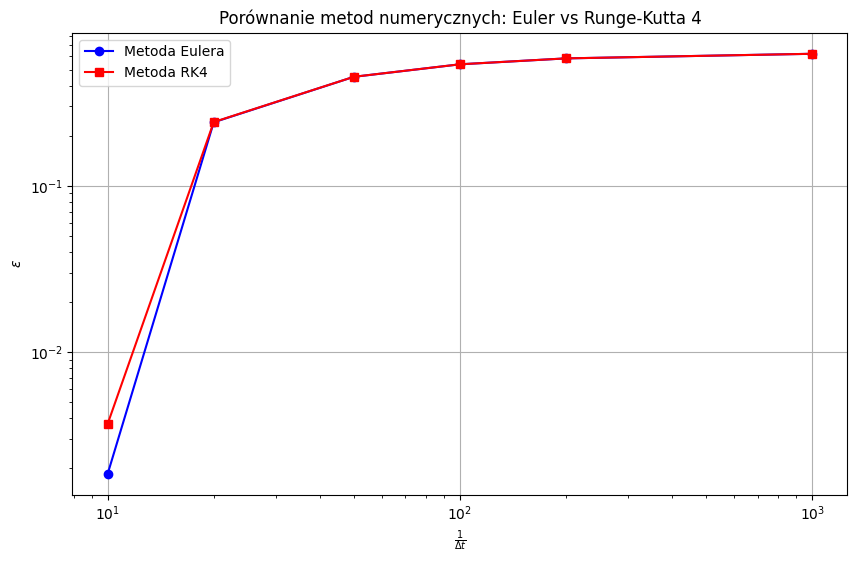

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry
alpha = 0.1  # Stała
S0 = 1.0  # Początkowa wartość S
T = 10  # Czas końcowy
dt_values = np.array([0.1, 0.05, 0.02, 0.01, 0.005, 0.001])  # Różne wartości kroku czasowego
time = np.linspace(0, T, 100)  # Oś czasu dla porównań

# Funkcja dokładna (rozw. analityczne)
def S_exact(t):
    return S0 * np.exp(-alpha * t)

# Funkcja dla metody Eulera
def euler_method(dt, alpha, S0, T):
    steps = int(T / dt)
    S = np.zeros(steps)
    S[0] = S0
    t = np.linspace(0, T, steps)
    
    for i in range(1, steps):
        S[i] = S[i-1] - alpha * S[i-1] * dt
    return t, S

# Funkcja dla metody Rungego-Kutty 4. rzędu (RK4)
def rk4_method(dt, alpha, S0, T):
    steps = int(T / dt)
    S = np.zeros(steps)
    S[0] = S0
    t = np.linspace(0, T, steps)
    
    for i in range(1, steps):
        k1 = -alpha * S[i-1]
        k2 = -alpha * (S[i-1] + 0.5 * dt * k1)
        k3 = -alpha * (S[i-1] + 0.5 * dt * k2)
        k4 = -alpha * (S[i-1] + dt * k3)
        
        S[i] = S[i-1] + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return t, S

# Obliczanie błędu dla obu metod
errors_euler = []
errors_rk4 = []

for dt in dt_values:
    t_exact = time
    S_exact_vals = S_exact(t_exact)
    
    t_euler, S_euler = euler_method(dt, alpha, S0, T)
    t_rk4, S_rk4 = rk4_method(dt, alpha, S0, T)
    
    # Obliczanie błędu (maksymalna różnica)
    error_euler = np.max(np.abs(S_exact_vals - S_euler[:len(S_exact_vals)]))
    error_rk4 = np.max(np.abs(S_exact_vals - S_rk4[:len(S_exact_vals)]))
    
    errors_euler.append(error_euler)
    errors_rk4.append(error_rk4)

# Wykres błędu w zależności od kroku czasowego (1/deltaT)
plt.figure(figsize=(10, 6))

# Tworzymy wykres dla metody Eulera
plt.plot(1/dt_values, errors_euler, label='Metoda Eulera', marker='o', linestyle='-', color='blue')

# Tworzymy wykres dla metody Rungego-Kutty 4
plt.plot(1/dt_values, errors_rk4, label='Metoda RK4', marker='s', linestyle='-', color='red')

# Logarytmiczna skala dla obu osi
plt.xscale('log')
plt.yscale('log')

# Dodanie etykiet, tytułu i legendy
plt.xlabel(r'$\frac{1}{\Delta t}$')
plt.ylabel(r'$\epsilon$')
plt.title('Porównanie metod numerycznych: Euler vs Runge-Kutta 4')
plt.legend()
plt.grid(True)

# Wyświetlenie wykresu
plt.show()



---

# Podsumowanie

porownie metody EUlera i RK4 + wnioski + jak to ma sie ogolnie do SI i SIR 

---

# Literatura

https://www.youtube.com/watch?v=2GEzDzbMkpk&t=1098s&ab_channel=ICMUniversityofWarsaw - fajny filmik o modelowaniu epidemii uwzględnia rozwój epidemii w Polsce, konkretne miasta dużo przydatnych materiałów dobry wzór

https://sc21.icm.edu.pl/index.php/icm-epidemiological-model/ - Artykuł twórcy filmiku różne wykresy

https://www.youtube.com/watch?v=j46osLueJKc&ab_channel=FranciszekRakowski - filmik pokazujacy rozprzestrzenianie sie epidemii w Polsce (Graf)

https://kosmos.ptpk.org/index.php/Kosmos/article/download/2828/2719/5664 - wytłumaczenie modelu SIR, SEIR oraz SI

https://koronawirusunas.pl/ - wszystkie dane dotyczace koronawirusa w Polsce od poczatku epidemii

https://www.iorajournal.org/ijgor/article/view/67/73 - artykul o analizie SIR przy uzyciu metod numerycznych

https://youtu.be/ukNbG7muKho?si=aFuv6m7yGa3H3dvo - Metoda Eulera

https://foton.if.uj.edu.pl/documents/12579485/149668788/E_G-N.pdf/8f29f7de-63b5-4709-8bba-57e3461f790b - SI, SIS, SIR artykul Uniwersytetu Jagiellonskiego 

https://blog.tonytsai.name/blog/2014-11-24-rk4-method-for-solving-sir-model - uzycie rk4 na SIR